🔹 Dataset Shape: (2126, 14)

🔹 First 5 Rows:
            LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  

🔹 Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

🔹 Summary Statistics:
               

<Figure size 1200x800 with 0 Axes>

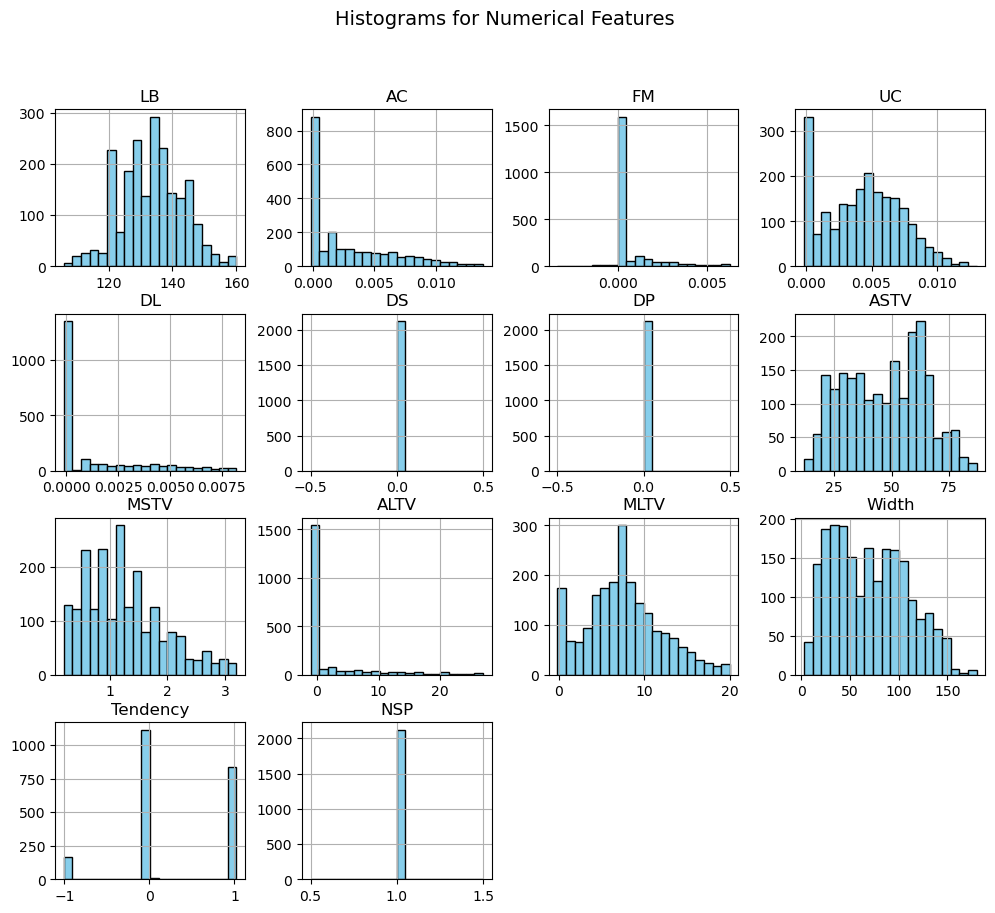

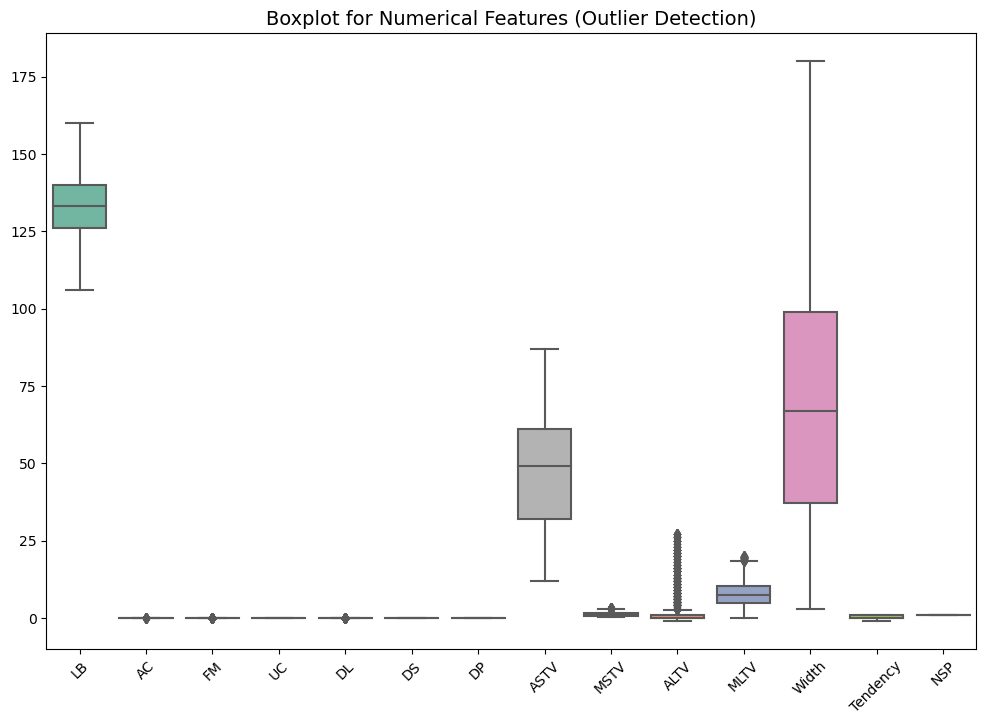

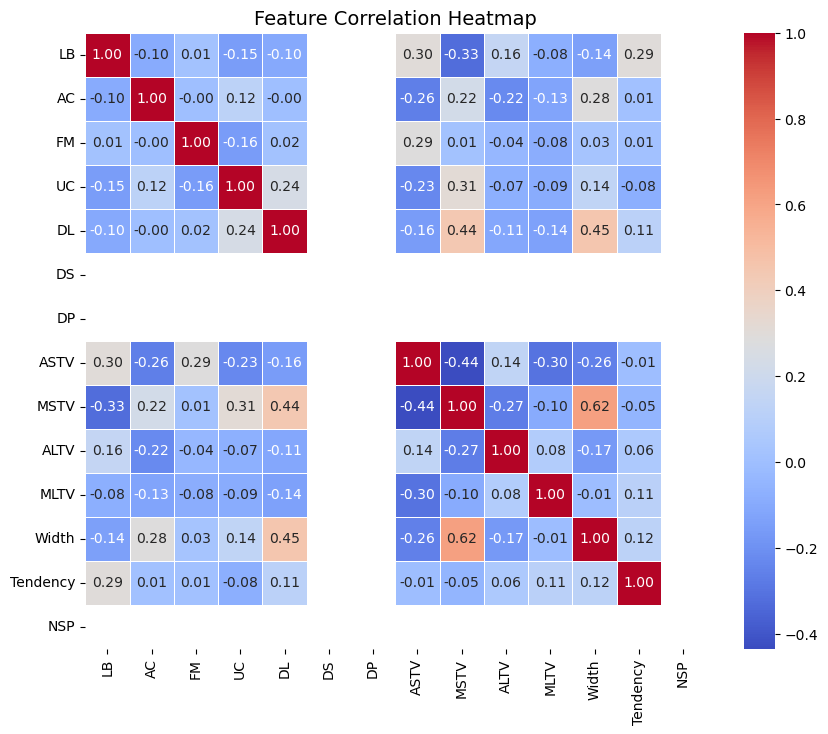

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


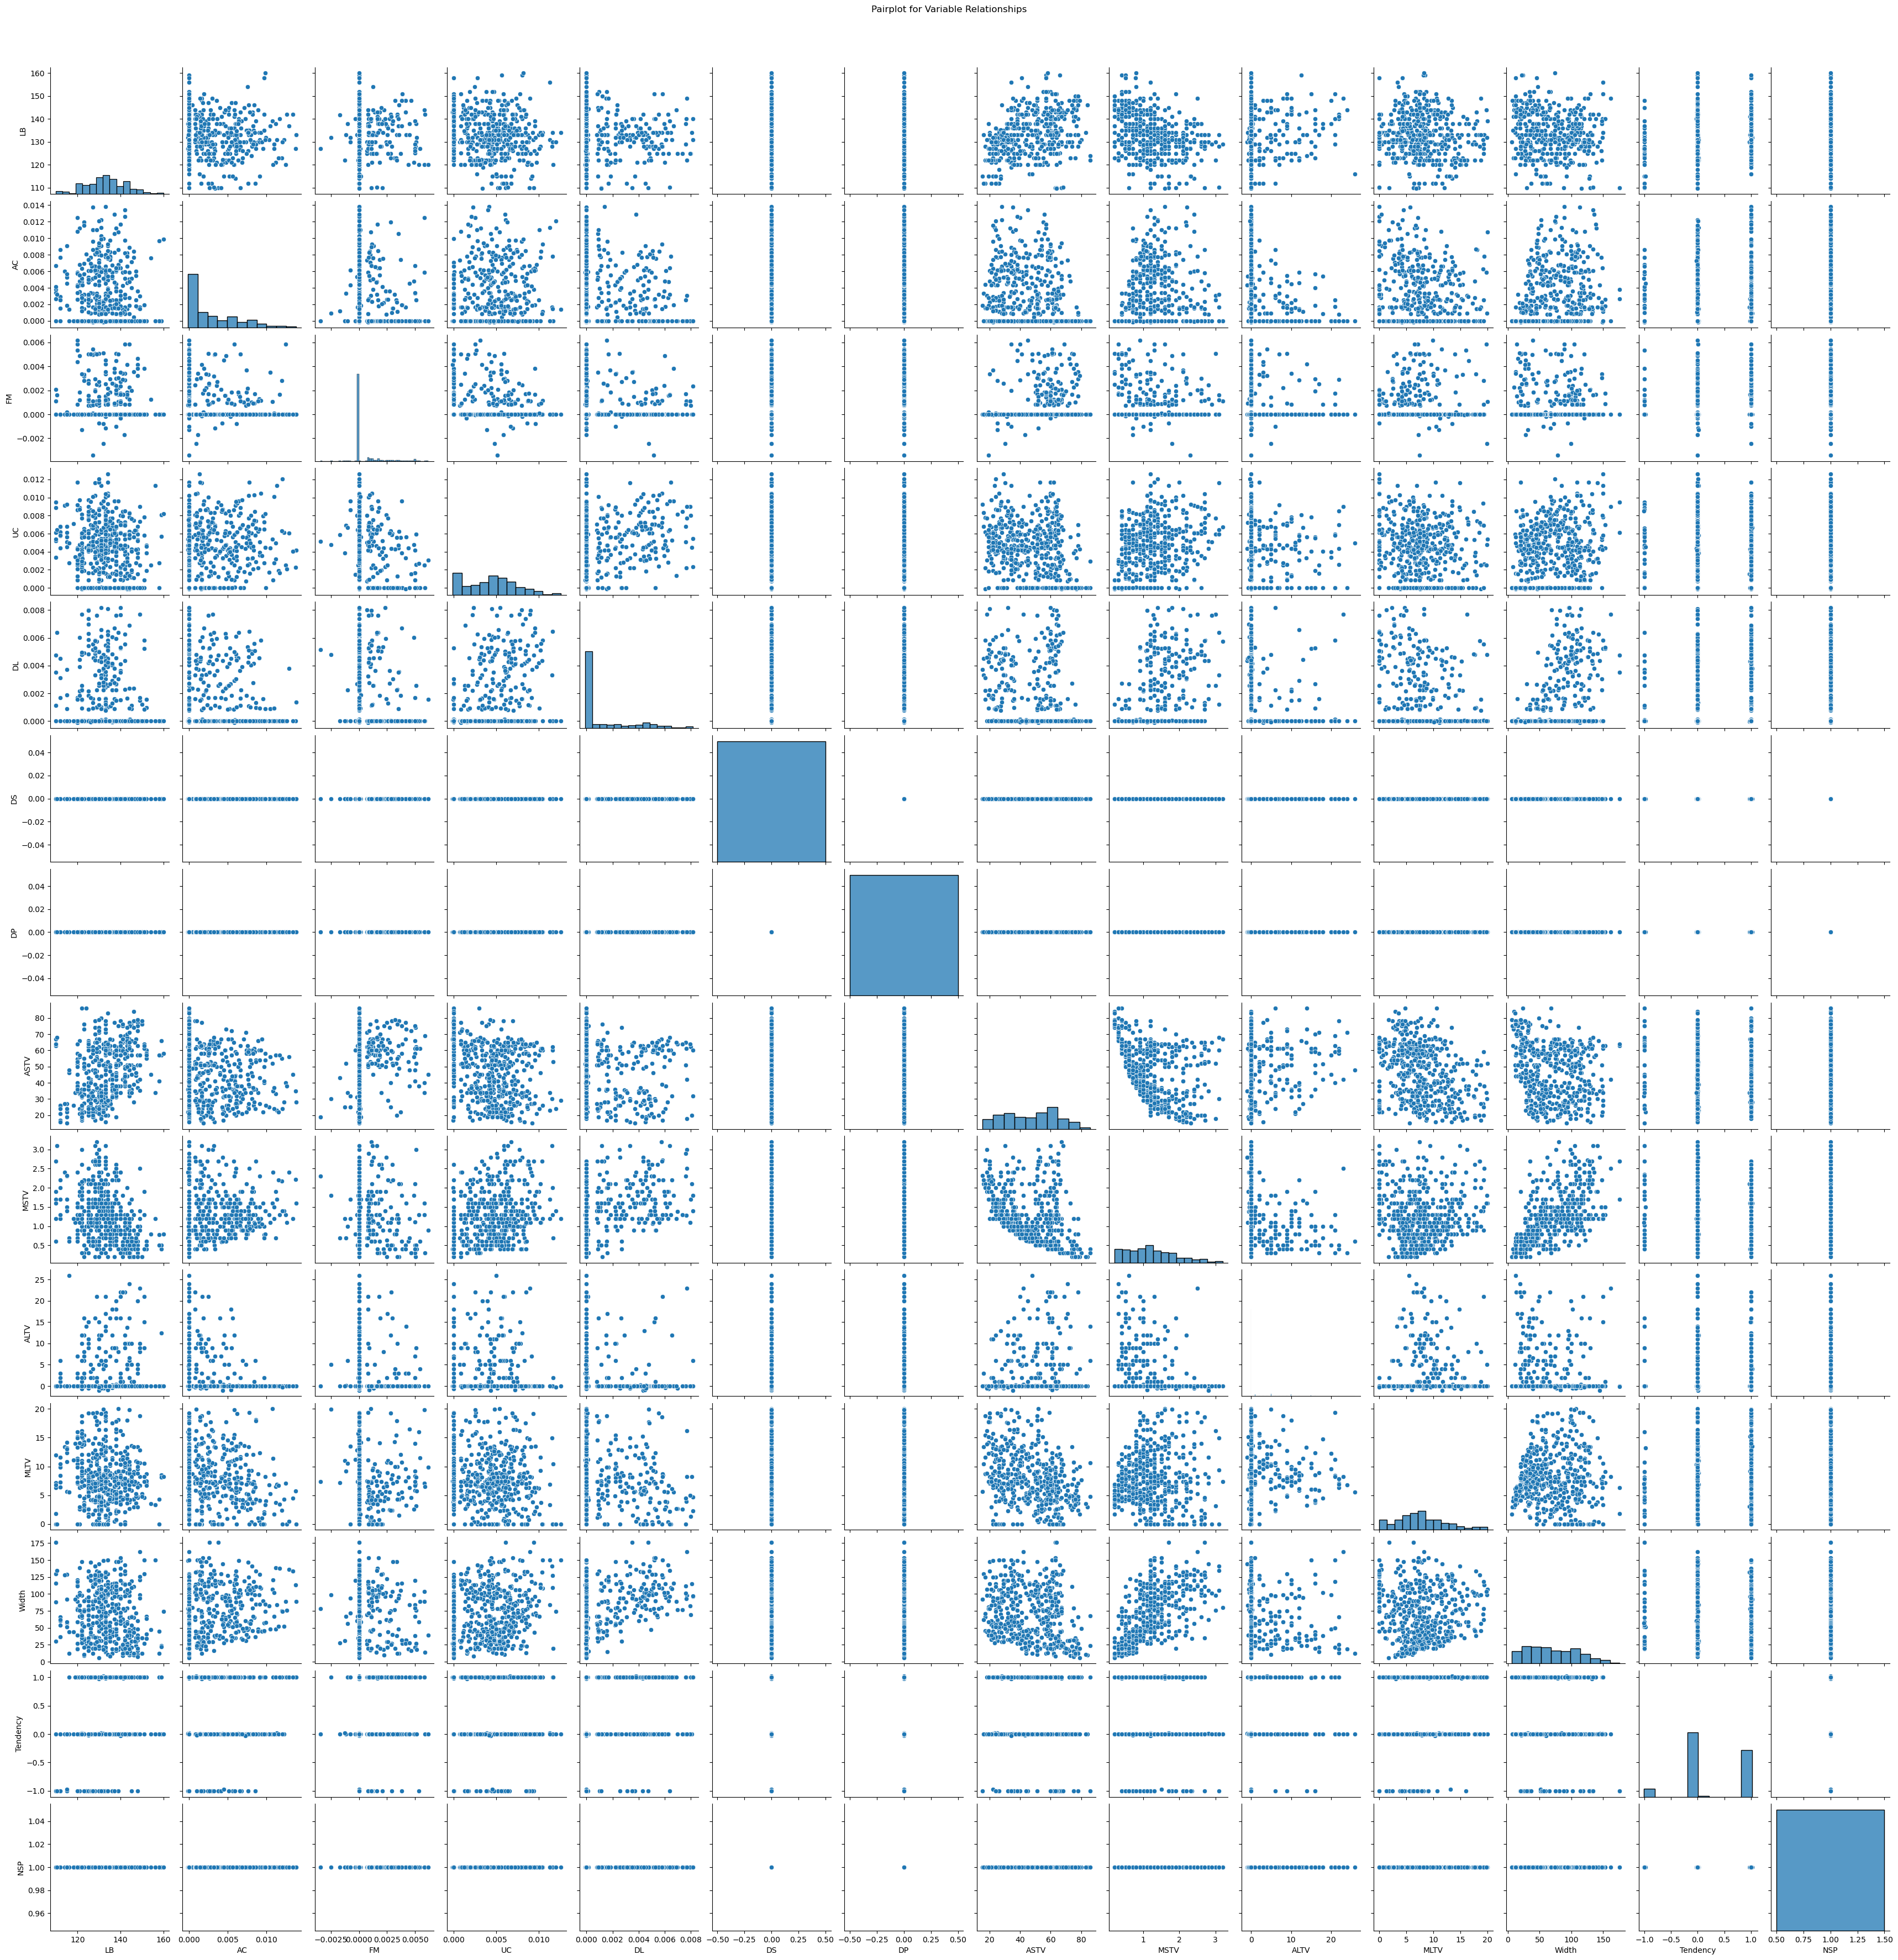

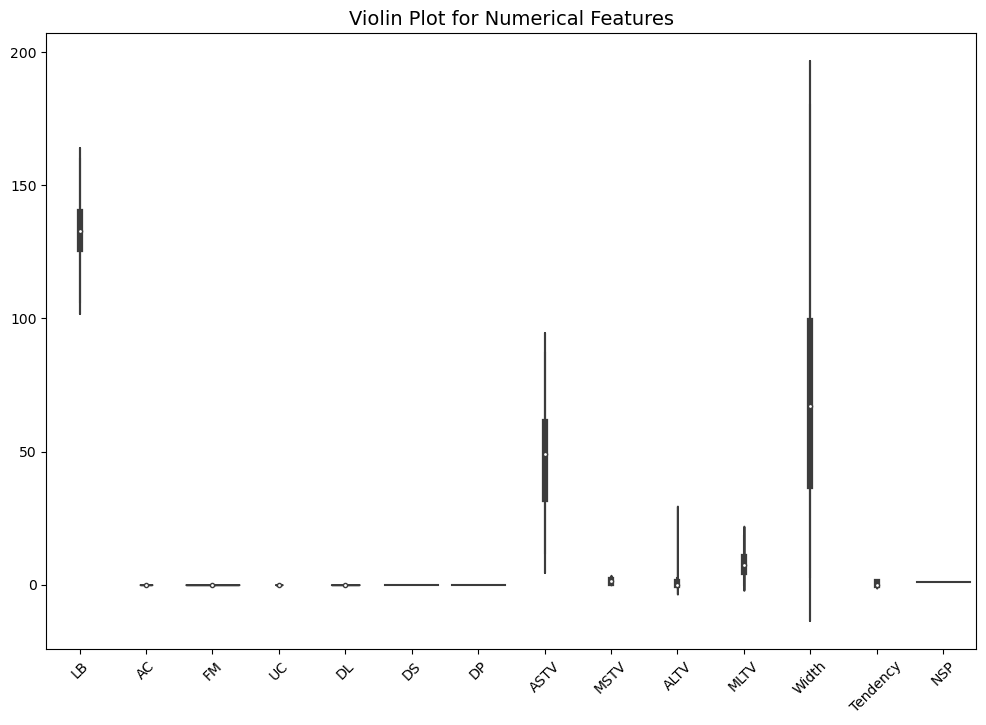


✅ EDA Completed Successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\Cardiotocographic.csv"
df = pd.read_csv(file_path)

# 📌 Quick Overview
print(f"🔹 Dataset Shape: {df.shape}")
print("\n🔹 First 5 Rows:\n", df.head())
print("\n🔹 Missing Values:\n", df.isnull().sum())

# 📌 Handle Missing Values (Use Median Instead of Mean)
df.fillna(df.median(numeric_only=True), inplace=True)

# 📌 Convert Problematic Columns
df['AC'] = pd.to_numeric(df['AC'], errors='coerce')

# 📌 Summary Statistics
stat_summary = df.describe()
print("\n🔹 Summary Statistics:\n", stat_summary)

# 📌 Detect Outliers Using IQR Method
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers_sum = outliers.sum()
print("\n🔹 Outlier Counts Per Column:\n", outliers_sum)

# 📌 Option 1: Remove Outliers (Comment this out if you don't want to remove them)
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 📌 Option 2: Replace Outliers with Median (Recommended for Skewed Data)
for col in df.select_dtypes(include=['number']).columns:
    median_value = df[col].median()
    df.loc[outliers[col], col] = median_value

# 📌 Check Correlations
correlation_matrix = df.corr(numeric_only=True)

# 📌 Highly Correlated Features (Threshold > 0.7)
high_corr = correlation_matrix[correlation_matrix > 0.7]
print("\n🔹 Highly Correlated Features (Above 0.7):\n", high_corr)

# 🔹 📊 Improved Visualizations 🔹 #

# 📌 Histogram
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numerical Features', fontsize=14)
plt.show()

# 📌 Boxplot (Highlight Outliers)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette="Set2", linewidth=1.5)
plt.title('Boxplot for Numerical Features (Outlier Detection)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 📌 Heatmap with Adjustments
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

# 📌 Pairplot (Sampled to Improve Performance)
sns.pairplot(df.sample(500))  # Reduce sample size for efficiency
plt.suptitle('Pairplot for Variable Relationships', y=1.02)
plt.show()

# 📌 Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, palette="muted")
plt.title('Violin Plot for Numerical Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

print("\n✅ EDA Completed Successfully!")
